In [14]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak
import os
import ast
import numpy as np
import json

from scripts import load_list_from_file, write_list_to_file, load_or_generate_data, draw_graph, draw_graph_from_adjacency_matrix

In [46]:
def estimate_hitting_time(m_values, n_values, start_vertex, end_vertex, num_simulations=10):
    """
    Estimate the hitting time between two vertices in a list of lollipop graphs.

    Parameters:
    m_values (list): The list of m values, each representing the number of vertices in the complete graph part of a lollipop graph.
    n_values (list): The list of n values, each representing the number of vertices in the path part of a lollipop graph.
    start_vertex (int): The starting vertex for the random walk.
    end_vertex (int): The target vertex for the random walk.
    num_simulations (int): The number of simulations to perform.

    Returns:
    hitting_times (list): A list of estimated average hitting times for each lollipop graph.
    """

    hitting_times = []

    for m, n in zip(m_values, n_values):
        print(f'\nCalculatig hitting time for m = {m} and n={n}')
        total_steps_for_all_simulations = 0

        # Create the lollipop graph
        graph = nx.lollipop_graph(m, n)
        print(list(graph.nodes)[-1])
        # print(end_vertex)
        print(list(graph.nodes)[end_vertex])
        current_node = list(graph.nodes)[start_vertex]
        end_node = list(graph.nodes)[end_vertex]
        
        for s in range(num_simulations):
            if s==0 or s==1 or s==10 or s==25 or s==35 or s==49 or s==59 or s==69 or s==79 or s==89 or s==99:
                # print(f'----> Sample number:{s}')
                pass
            total_steps_this_simulation = 0

            # Loop continues until end_vertex is reached
            while current_node != end_node:
                # Choose a neighbor randomly
                neighbors = list(nx.neighbors(graph, current_node))
                if neighbors:
                    current_node = random.choice(neighbors)
                total_steps_this_simulation += 1

            # Accumulate the total steps for this simulation
            total_steps_for_all_simulations += total_steps_this_simulation

        # Average the total steps over the number of simulations
        average_hitting_time = total_steps_for_all_simulations / num_simulations
        hitting_times.append(average_hitting_time)

    return hitting_times

In [49]:
m_range = range(2, 100)
# m = 20
n_range = range(2, 100)
# n = 20
sum_range = []
samples = 100

sum_range = list(map(lambda x, y: x + y, m_range, n_range))

initVertex = 0
targetVertex = -1

hitting_times_file = f'Datasets/DynGraphsDTRW/hittingTimeLollipop_N{sum_range[-1]}_FROM{initVertex}-TO{targetVertex}_S{samples}.txt'

print(f'Looking for: \n-----> {hitting_times_file}')

if os.path.exists(hitting_times_file):
    hitting_times = load_list_from_file(hitting_times_file)
    print('\nFile exists!')
else:
    print('\nFile Doesnt Exist!')
    hitting_times = estimate_hitting_time(m_range,n_range,initVertex,targetVertex,samples)
    write_list_to_file(hitting_times_file, hitting_times)



Looking for: 
-----> Datasets/DynGraphsDTRW/hittingTimeLollipop_N198_FROM0-TO-1_S100.txt

File Doesnt Exist!

Calculatig hitting time for m = 2 and n=2
3
3

Calculatig hitting time for m = 3 and n=3
5
5

Calculatig hitting time for m = 4 and n=4
7
7

Calculatig hitting time for m = 5 and n=5
9
9

Calculatig hitting time for m = 6 and n=6
11
11

Calculatig hitting time for m = 7 and n=7
13
13

Calculatig hitting time for m = 8 and n=8
15
15

Calculatig hitting time for m = 9 and n=9
17
17

Calculatig hitting time for m = 10 and n=10
19
19

Calculatig hitting time for m = 11 and n=11
21
21

Calculatig hitting time for m = 12 and n=12
23
23

Calculatig hitting time for m = 13 and n=13
25
25

Calculatig hitting time for m = 14 and n=14
27
27

Calculatig hitting time for m = 15 and n=15
29
29

Calculatig hitting time for m = 16 and n=16
31
31

Calculatig hitting time for m = 17 and n=17
33
33

Calculatig hitting time for m = 18 and n=18
35
35

Calculatig hitting time for m = 19 and n=19
37


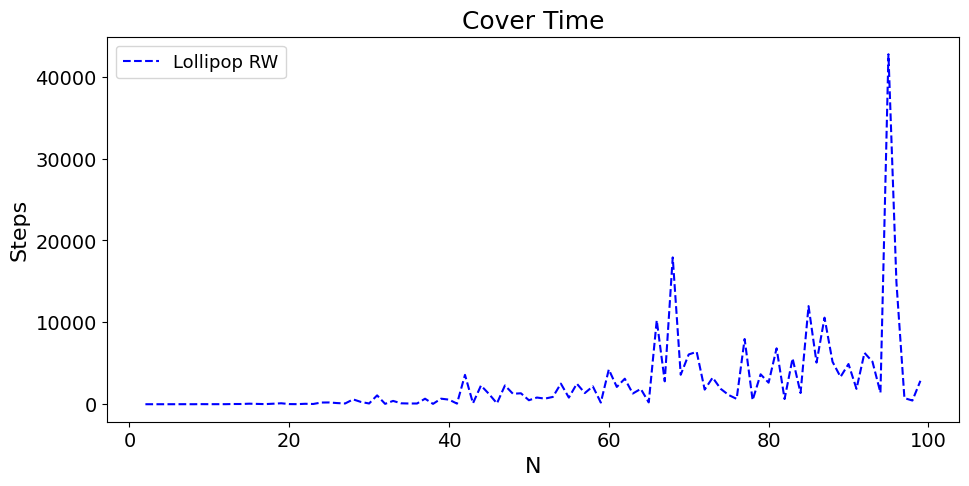

In [51]:
alphaLabelList = [r'Lollipop RW',r'$O(n^3)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Cover Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

plot_qwak(x_value_matrix = [list(n_range),list(n_range)] , y_value_matrix = [hitting_times],**params)